In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

%matplotlib inline

Value error parsing header in AFM: b'StartFontMetrics' b'2.0\rComment UniqueID 4002432\rComment Panose 2 0 5 6 2 0 0 2 0 4\rFullName GE Inspira\rFontName GEInspira\rFamilyName GE Inspira\rWeight Regular\rNotice Digitized data (C) 2004 Agfa Monotype Corporation. All rights reserved. GE Inspira is a trademark of the General Electric Company.\rVersion 002.000\rIsFixedPitch false\rItalicAngle 0.00\rFontBBox -182 -232 1141 920\rAscender 750\rDescender -211\rXHeight 514\rCapHeight 684\rUnderlinePosition -133\rUnderlineThickness 20\rStdHW 59\rStdVW 56\rEncodingScheme AdobeStandardEncoding\rStartCharMetrics 327\rC 1 ; WX 640 ; N Eth ; B 16 0 595 680 ;\rC 2 ; WX 537 ; N eth ; B 45 -10 492 750 ;\rC 3 ; WX 476 ; N Lslash ; B 16 0 462 683 ;\rC 4 ; WX 248 ; N lslash ; B -1 -3 249 750 ;\rC 5 ; WX 509 ; N Scaron ; B 41 -10 455 877 ;\rC 6 ; WX 437 ; N scaron ; B 36 -10 397 727 ;\rC 7 ; WX 502 ; N Yacute ; B 24 -3 478 902 ;\rC 8 ; WX 474 ; N yacute ; B -1 -212 449 752 ;\rC 11 ; WX 541 ; N Thorn ; B 90 

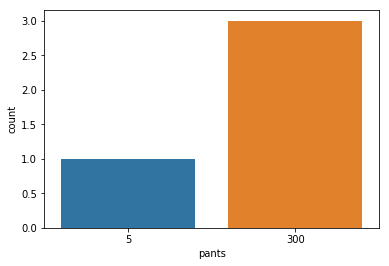

In [4]:
items2 = [{'bikes': 20, 'pants': 300, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}, 
          {'bikes': 30, 'pants': 300}, {'bikes': 10, 'pants': 300}]
df = pd.DataFrame(items2)
sb.countplot(data=df, x='pants');

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


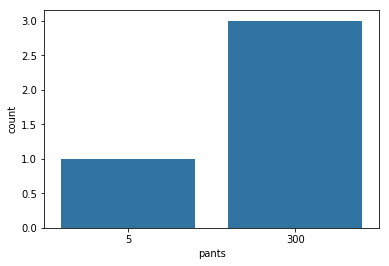

In [60]:
base_color = sb.color_palette()[0]
print(sb.color_palette())
sb.countplot(data=df, x='pants', color=base_color)

In [61]:
pant_order = df['pants'].value_counts().index
print(pant_order)

Int64Index([300, 5], dtype='int64')


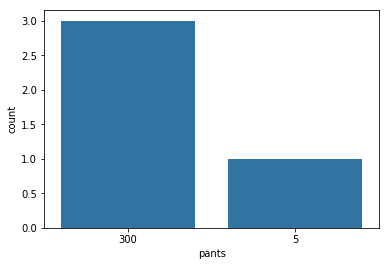

In [62]:
sb.countplot(data=df, x='pants', color=base_color, order = pant_order)

In [63]:
level_order = [5, 300, 0]
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
df['pants'] = df['pants'].astype(ordered_cat)

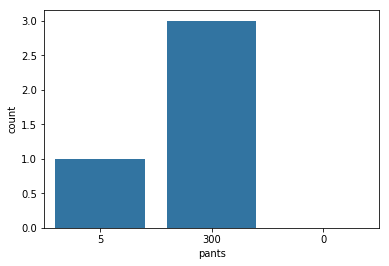

In [64]:
sb.countplot(data=df, x='pants', color=base_color)

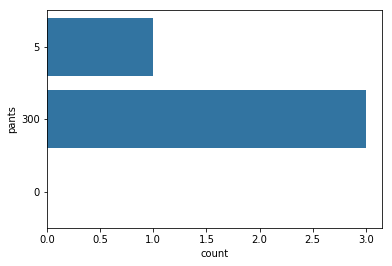

In [65]:
sb.countplot(data=df, y='pants', color=base_color)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

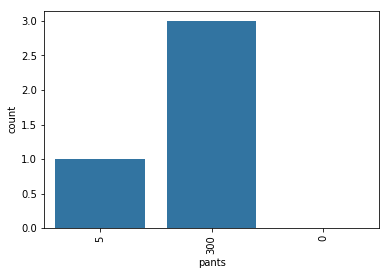

In [66]:
sb.countplot(data=df, x='pants', color=base_color)
plt.xticks(rotation = 90)

3 0.75 4
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7 ] ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70']
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8]
25.0
75.0
0.0


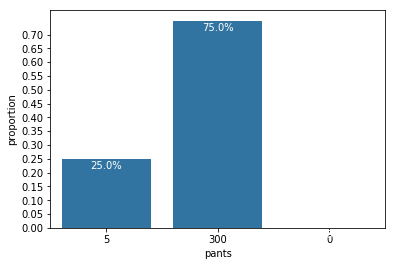

In [120]:
n_points = df.shape[0]
max_count = df['pants'].value_counts().max()
max_prop = max_count/n_points
print(max_count, max_prop, n_points)

tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_props, tick_names)
print(tick_props * n_points)
sb.countplot(data=df, x='pants', color=base_color)
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion')

cat_counts = df['pants'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cat_counts[int(label.get_text())]
    print(100*count/n_points)
    txt = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-0.15, txt, ha = 'center', color = 'w')

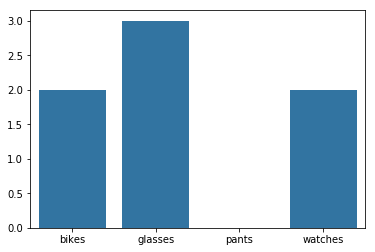

In [125]:
na_counts = df.isna().sum()
sb.barplot(na_counts.index.values, na_counts, color = sb.color_palette()[0])

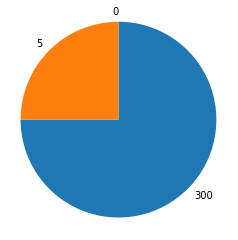

In [130]:
sorted_counts = df['pants'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

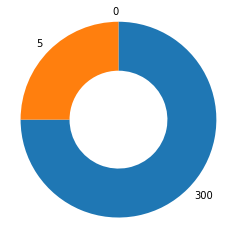

In [134]:
plt.pie(sorted_counts, labels = sorted_counts.index, 
        startangle = 90, counterclock = False, wedgeprops = {'width': 0.5});
plt.axis('square');

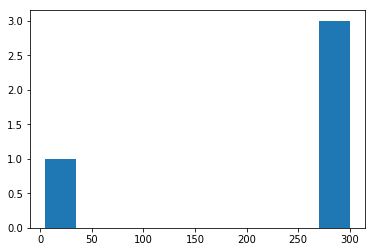

In [152]:
plt.hist(data = df, x = 'pants');

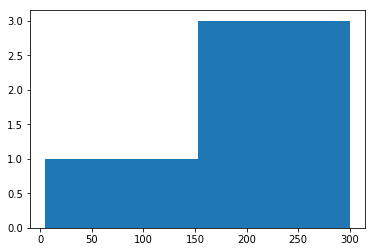

In [161]:
plt.hist(data = df, x = 'pants', bins = 2);

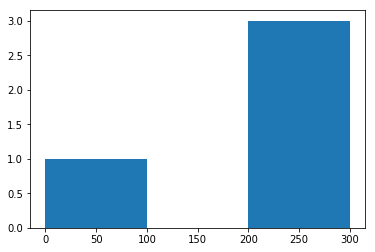

In [151]:
plt.hist(data = df, x = 'pants', bins = np.arange(0, df['pants'].max()+1, 100));

/Users/vendhan/anaconda3/envs/aipnd/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


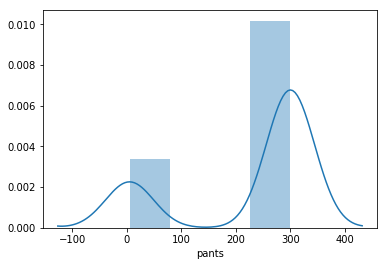

In [154]:
sb.distplot(df['pants']);

/Users/vendhan/anaconda3/envs/aipnd/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


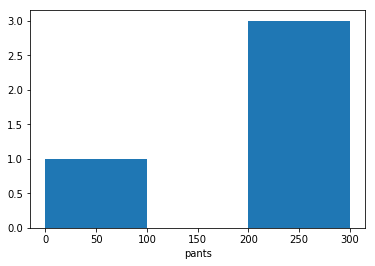

In [159]:
sb.distplot(df['pants'], bins = np.arange(0, df['pants'].max()+1, 100), kde = False,
           hist_kws = {'alpha': 1});

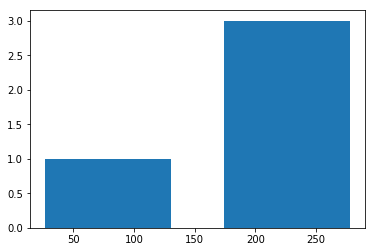

In [162]:
plt.hist(data = df, x = 'pants', bins = 2, rwidth = 0.7);

(0, 500)

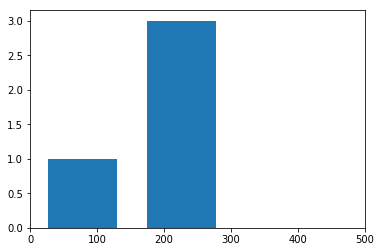

In [165]:
plt.hist(data = df, x = 'pants', bins = 2, rwidth = 0.7);
plt.xlim(0, 500)

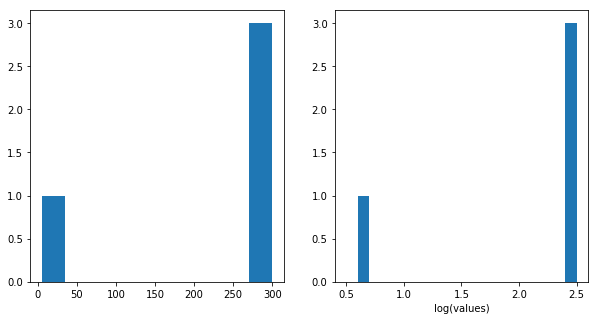

In [170]:
plt.figure(figsize = [10, 5])

# histogram on left: natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['pants'].max()+100, 100)
plt.hist(df['pants'])

# histogram on right: directly log-transform data
plt.subplot(1, 2, 2)
log_ln_data = np.log10(df['pants'])
log_bin_edges = np.arange(0.5, log_ln_data.max()+0.1, 0.1)
plt.hist(log_ln_data, bins = log_bin_edges)
plt.xlabel('log(values)'); # add axis label for clarity

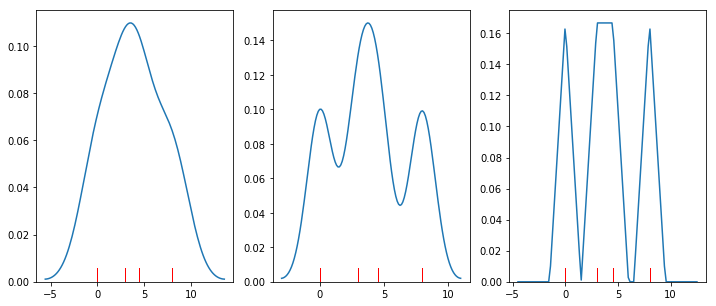

In [172]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1});

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'});

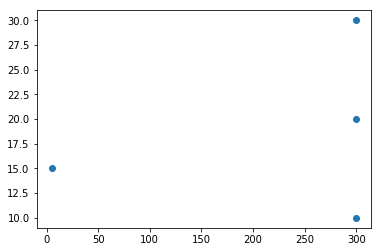

In [174]:
plt.scatter(data = df, x = 'pants', y = 'bikes');

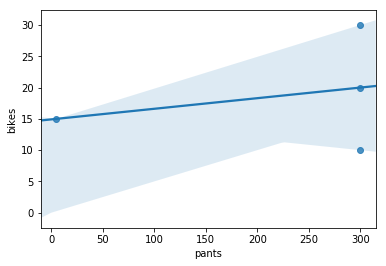

In [176]:
sb.regplot(data = df, x = 'pants', y = 'bikes');

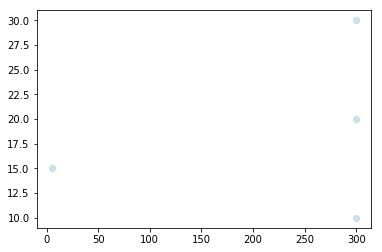

In [5]:
plt.scatter(data = df, x = 'pants', y = 'bikes', alpha=1/5);

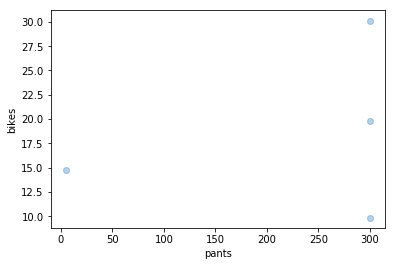

In [8]:
sb.regplot(data = df, x = 'pants', y = 'bikes', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

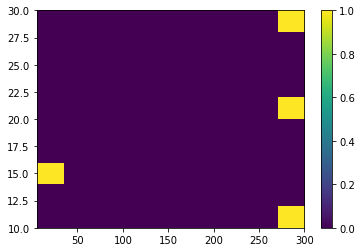

In [13]:
plt.hist2d(data = df, x = 'pants', y = 'bikes');
plt.colorbar();

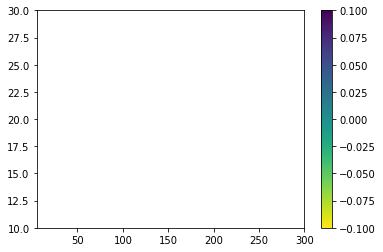

In [16]:
plt.hist2d(data = df, x = 'pants', y = 'bikes', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

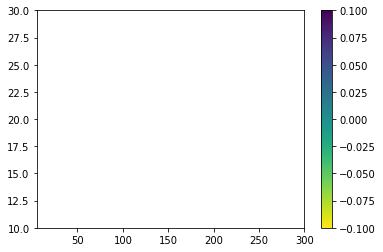

In [18]:
plt.hist2d(data = df, x = 'pants', y = 'bikes', cmap = 'viridis_r', cmin = 1.1); 
#cell colored only if the num of points > cmin
plt.colorbar();

5.0 14.0
270.5 10.0
270.5 20.0
270.5 28.0


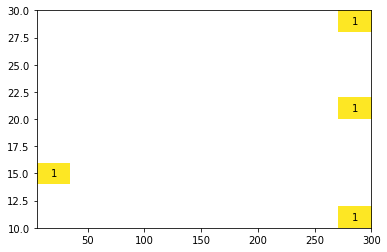

In [61]:
h2d = plt.hist2d(data = df, x = 'pants', y = 'bikes', cmap = 'viridis_r', cmin = 0.5); 
(counts, bins_x, bins_y, _) = h2d

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 2: # increase visibility on darkest cells
            plt.text(bins_x[i], bins_y[j], int(c),
                     ha = 'center', va = 'center', color = 'white');
        elif c > 0:
            print(bins_x[i], bins_y[j])
            plt.text(bins_x[i]+15, bins_y[j]+1, int(c),
                    ha = 'center', va = 'center', color = 'black')
#             plt.text(bins_x[i], bins_y[j], int(c),
#                      ha = 'center', va = 'center', color = 'black');

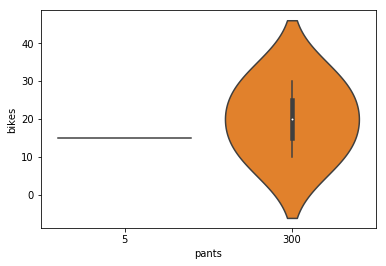

In [63]:
sb.violinplot(data = df, x = 'pants', y = 'bikes');

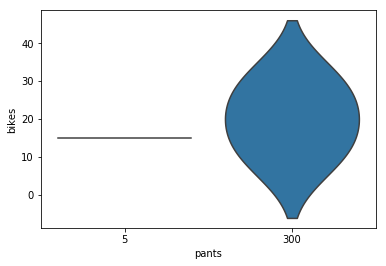

In [64]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'pants', y = 'bikes', color = base_color,
              inner = None)

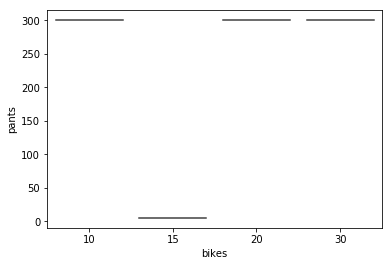

In [65]:
sb.violinplot(data = df, y = 'pants', x = 'bikes', color = base_color,
              inner = None)

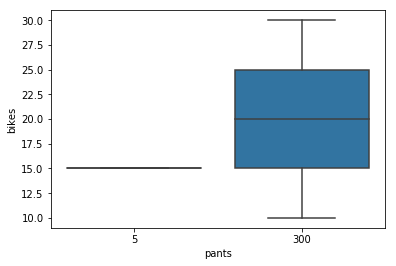

In [66]:
sb.boxplot(data = df, x = 'pants', y = 'bikes', color = base_color)

(-8.660314358725074, 48.66031435872508)

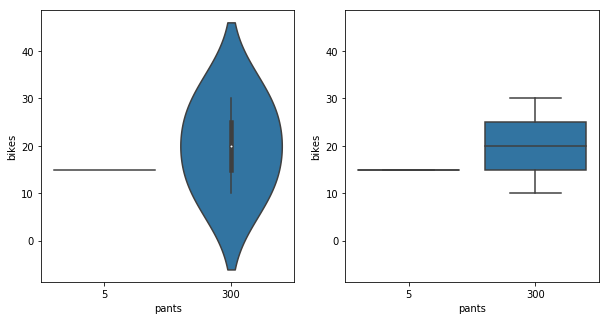

In [67]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'pants', y = 'bikes', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'pants', y = 'bikes', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

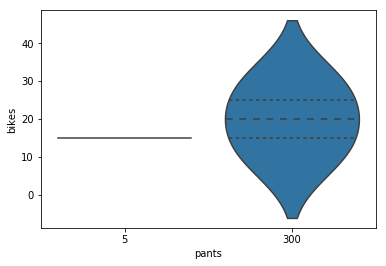

In [68]:
sb.violinplot(data = df, x = 'pants', y = 'bikes', color = base_color,
              inner = 'quartile')